In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:


n = 4
V = (n**3)*(a**3)
N = 4*(n**3)
rho = 0.55
a = (4/rho)**(1/3)
T = 0.2

In [11]:
# Generating velocity
v = []
for i in range(N):
    vp = []
    for j in range(3):
        temp = np.random.normal(0,np.sqrt(T))
        vp.append(temp)
    v.append(np.array(vp))
v = np.array(v)

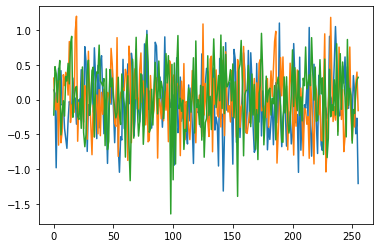

In [13]:
plt.plot(v)

## Creating the initial configurations

In [14]:
a1 = np.array([0.5,0.5,0])
a2 = np.array([1,0,0])
a3 = np.array([0.5,0,0.5])
a4 = np.array([0,0,1])



r1=[]
for i in range(8):
    for j in range(4):
        r1.append(np.array([(i*a1[0]+j*a2[0])%n,(i*a1[1]+j*a2[1])%n,(i*a1[2]+j*a2[2])%n]))
r1 = np.array(r1)
r2 = []
for i in range(32):
    r2.append(np.array([(r1[i][0]+a3[0])%n,(r1[i][1]+a3[1])%n,(r1[i][2]+a3[2])%n]))
r2 = np.array(r2)
r3 = []
rl = r1
rp = r2
for i in range(3):
    rp1 = []
    rp2 = []
    
    for j in range(32):
        rp1.append(np.array([(rl[j][0]+a4[0])%n,(rl[j][1]+a4[1])%n,(rl[j][2]+a4[2])%n]))
        rp2.append(np.array([(rp[j][0]+a4[0])%n,(rp[j][1]+a4[1])%n,(rp[j][2]+a4[2])%n]))
    rp1 = np.array(rp1)
    rp2 = np.array(rp2)
    r3.append(np.concatenate((rp1,rp2)))
    rl = rp1
    rp = rp2
r3 = np.array(r3)
r = np.concatenate((r1,r2,r3[0],r3[1],r3[2]))
r = a * r  

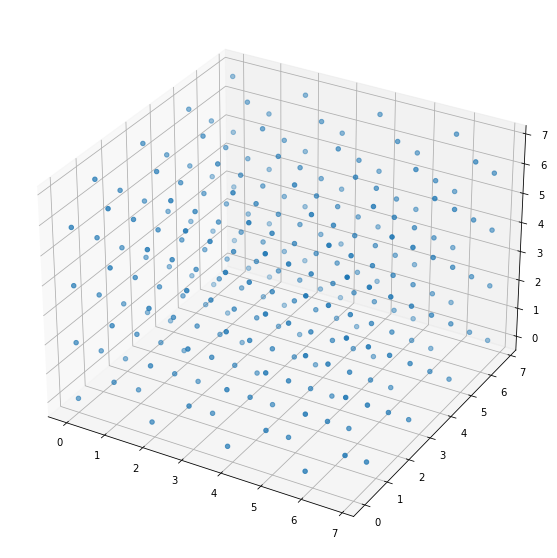

In [67]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r[:,0],r[:,1],r[:,2])
plt.savefig("initalfcc.pdf")

In [37]:
steps = 2000
de = 0.005
 
rf = np.zeros((steps,N,3))
rf[0] = r
# rf stores the configuration of N particle at each time step
 
vf = np.zeros((steps,N,3))
vf[0] = v
# vf stores the velocity of each particle at each time step
 
rc = 2.5 # cut off

In [38]:
# Defining vectors for image cell
R_im = np.zeros((27,3))
vec = np.array([0,0,0])
R_im[0] = vec + np.array([1,1,1])*n*a
R_im[1] = vec + np.array([1,1,0])*n*a
R_im[2] = vec + np.array([1,1,-1])*n*a

R_im[3] = vec + np.array([1,0,1])*n*a
R_im[4] = vec + np.array([1,0,0])*n*a
R_im[5] = vec + np.array([1,0,-1])*n*a

R_im[6] = vec + np.array([1,-1,1])*n*a
R_im[7] = vec + np.array([1,-1,0])*n*a
R_im[8] = vec + np.array([1,-1,-1])*n*a

R_im[9] = vec + np.array([0,1,1])*n*a
R_im[10] = vec + np.array([0,1,0])*n*a
R_im[11] = vec + np.array([0,1,-1])*n*a

R_im[12] = vec + np.array([0,0,1])*n*a
R_im[13] = vec + np.array([0,0,0])*n*a
R_im[14] = vec + np.array([0,0,-1])*n*a

R_im[15] = vec + np.array([0,-1,1])*n*a
R_im[16] = vec + np.array([0,-1,0])*n*a
R_im[17] = vec + np.array([0,-1,-1])*n*a

R_im[18] = vec + np.array([-1,1,1])*n*a
R_im[19] = vec + np.array([-1,1,0])*n*a
R_im[20] = vec + np.array([-1,1,-1])*n*a

R_im[21] = vec + np.array([-1,0,1])*n*a
R_im[22] = vec + np.array([-1,0,0])*n*a
R_im[23] = vec + np.array([-1,0,-1])*n*a

R_im[24] = vec + np.array([-1,-1,1])*n*a
R_im[25] = vec + np.array([-1,-1,0])*n*a
R_im[26] = vec + np.array([-1,-1,-1])*n*a

In [39]:
# Defining functions for energy and force.

def KE(v):
    # v - velocity of all particles
    return np.sum((1/2)*np.sum(v**2,axis=1))/N

def PE_force(td,i_d):
    # ti = time index
    # i_d = particle index
    
    U_id = 0 # PE for particle index i_d
    force = np.zeros(3)
    
    d_arr = (rf[td] - rf[td][i_d])
    for j in range(N):
        R = R_im + d_arr[j]
        d2 = np.sum(R**2,axis = 1)
        m = np.argmin(d2)
        d = np.sqrt(np.min(d2))
        if (0 < d < rc):
            U_id = U_id + 4*((1/d)**12-(1/d)**6)
            force = force + (-(24/d**2)*(2*(1/d)**12 - (1/d)**6))*R[m]
    return [U_id,force]

In [40]:
# Initial values of energies, temperature and pressure
U = np.zeros(steps-1)
for i in range(N):
    U[0] = U[0] + PE_force(0,i)[0]
U[0] = U[0]/(2*N)
K = np.zeros(steps-1)
K[0] = KE(vf[0])

T = np.zeros(steps-1)
T[0] = (2/3)*K[0]

P = np.zeros(steps-1)
P[0] = (N/V)*T[0]

E = np.zeros(steps-1)
E[0] = K[0] + U[0]

In [21]:
E[0]

-3.2695127945551197

In [41]:
T[0]

0.20094530876324523

In [95]:
# initial iterate using verlet algorithm

for i in range(N):
    f = PE_force(0,i)[1]
    rm = rf[0][i] - vf[0][i]*de + (1/2)*f*de*de
    rf[1][i] = 2*rf[0][i] - np.array(rm) + f*de*de

rf = rf%(n*a)

In [96]:
def md_evolve(ind):
    # ti_: atom index
    # ii: time index
    P_ = 0
    ti_,ii = ind
    #print(ti_,ii)
    
    A = PE_force(ii,ti_)
    U_ = A[0]
    f_ = A[1]
    #print(a[1])
    del_ = rf[ii][ti_]-rf[ii-1][ti_]
    #print(del_)
    for j in range(3):
        if(del_[j]**2>rc**2):
            #print(np.abs(del_[j]))
            #print(n*a)
            del_[j] = np.sign(del_[j])*(np.abs(del_[j])-n*a)
            
    
    verlet_it = rf[ii][ti_] + del_ + f_*(de**2)
    vel = (del_ + (1/2)*f_*(de**2))/de
    
    return [verlet_it,U_/(2*N),P_/(2*N),vel]

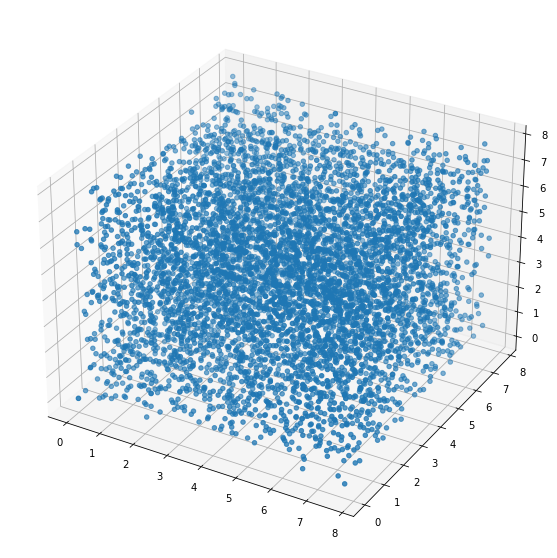

In [98]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rf[:,0],rf[:,1],rf[:,2])
plt.savefig("finalfcc.pdf")